In [1]:
from imutils import paths
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.special import softmax
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

2024-09-17 16:05:20.774688: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


2024-09-17 16:05:22.508989: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-09-17 16:05:22.510124: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-09-17 16:05:22.519056: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-09-17 16:05:22.519092: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: gunner-ThinkPad-P52
2024-09-17 16:05:22.519101: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: gunner-ThinkPad-P52
2024-09-17 16:05:22.519315: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 535.171.4
2024-09-17 16:05:22.519351: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 535.171.4
2024-09-17 16:05:22.519359: I tensorflow/stream_executor/cud

In [3]:
tf.config.list_physical_devices('GPU')

[]

#**Fetching**

In [4]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/Temp/Data-Mining/Dataset/FR0"))

data = []
data_cropped = []
labels = []
label = 0
counter_0 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 130, 130, 40, 40)
  data_cropped.append(image)
  labels.append(label)
  counter_0 += 1
print(f'Loaded FR0... {counter_0} files has loaded.')

2024-09-17 16:05:22.560378: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-17 16:05:22.561283: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


Loaded FR0... 6066 files has loaded.


In [5]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/Temp/Data-Mining/Dataset/FRI"))


label = 1
counter_1 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 130, 130, 40, 40)
  data_cropped.append(image)
  labels.append(label)
  counter_1 += 1
print(f'Loaded FRI... {counter_1} files has loaded.')

Loaded FRI... 5008 files has loaded.


In [6]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/Temp/Data-Mining/Dataset/FRII"))

label = 2
counter_2 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 130, 130, 40, 40)
  data_cropped.append(image)
  labels.append(label)
  counter_2 += 1
print(f'Loaded FRII... {counter_2} files has loaded.')

Loaded FRII... 2066 files has loaded.


#**EDA**

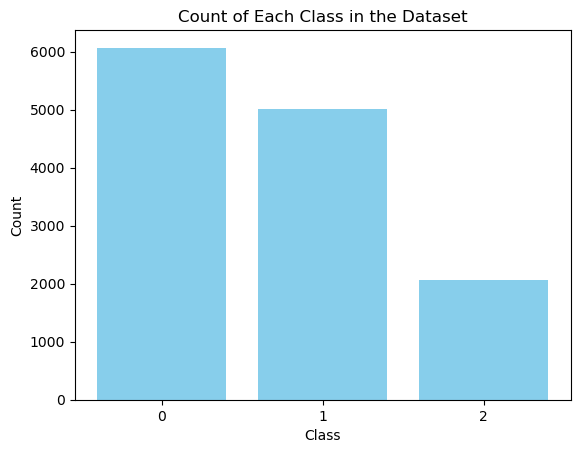

In [7]:
counter = Counter(labels)
sorted_counts = dict(sorted(counter.items()))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class in the Dataset')
plt.xticks(range(3))
plt.show()

In [8]:
labels = np.array(labels,dtype='uint8')
data = np.array(data,dtype='uint8')
data_cropped = np.array(data_cropped,dtype='uint8')

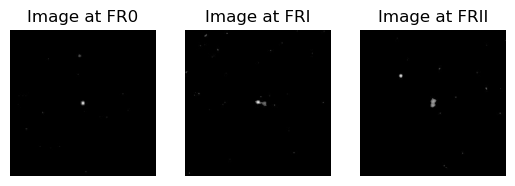

In [9]:
image = np.squeeze(data[0])
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FR0")

image = np.squeeze(data[6066])
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRI")

image = np.squeeze(data[11075])
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

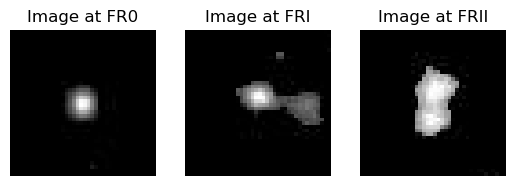

In [10]:
image = np.squeeze(data_cropped[0])
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FR0")

image = np.squeeze(data_cropped[6066])
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRI")

image = np.squeeze(data_cropped[11075])
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

In [11]:
data.shape, data_cropped.shape

((13140, 300, 300, 1), (13140, 40, 40, 1))

In [12]:
np.min(data_cropped[0]), np.max(data_cropped[0])

(0, 248)

#**Preprocessing**

In [13]:
data_normalized = data_cropped / 255

In [14]:
print(f'Min of original = {np.min(data_cropped[0])}')
print(f'Max of original = {np.max(data_cropped[0])}')
print(f'Min of original = {np.min(data_normalized[0])}')
print(f'Max of original = {np.max(data_normalized[0])}')

Min of original = 0
Max of original = 248
Min of original = 0.0
Max of original = 0.9725490196078431


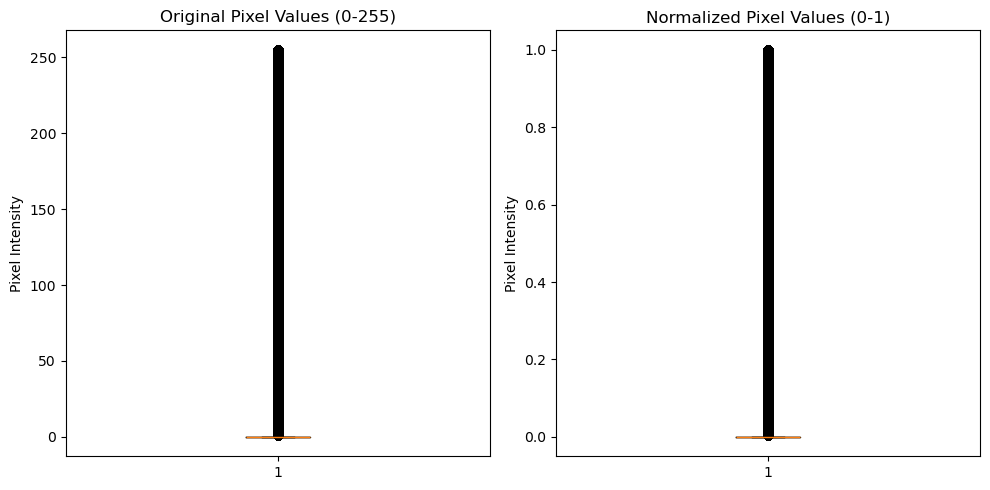

In [15]:
cropped_flat = data_cropped.flatten()
normalized_flat = data_normalized.flatten()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(cropped_flat)
plt.title("Original Pixel Values (0-255)")
plt.ylabel("Pixel Intensity")

plt.subplot(1, 2, 2)
plt.boxplot(normalized_flat)
plt.title("Normalized Pixel Values (0-1)")
plt.ylabel("Pixel Intensity")

plt.tight_layout()
plt.show()

#**Splitting**

In [16]:
x = data_normalized
y = labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9198, 40, 40, 1), (9198,), (3942, 40, 40, 1), (3942,))

#**CNN**

In [145]:
model_cnn = keras.Sequential()
model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(40, 40, 1)))
model_cnn.add(keras.layers.MaxPool2D(pool_size=(2, 2)))


model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_cnn.add(keras.layers.MaxPool2D(pool_size=(2, 2)))


model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(units=128, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.5))
model_cnn.add(keras.layers.Dense(units=64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.4))
model_cnn.add(keras.layers.Dense(units=32, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))
model_cnn.add(keras.layers.Dense(units=16, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.2))



model_cnn.add(keras.layers.Dense(units=3, activation=keras.activations.softmax))


#Model Compiling
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = [keras.metrics.CategoricalAccuracy()]

model_cnn.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


#Builing and Summury
model_cnn.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 38, 38, 64)        640       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 17, 17, 64)        36928     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 576)             

In [146]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [147]:
hist = model_cnn.fit(x_train, y_train, batch_size=16, epochs=30, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/30
575/575 [==============================] - 14s 24ms/step - loss: 0.9252 - accuracy: 0.5446 - val_loss: 0.5494 - val_accuracy: 0.7968
Epoch 2/30
575/575 [==============================] - 13s 23ms/step - loss: 0.5945 - accuracy: 0.7649 - val_loss: 0.5248 - val_accuracy: 0.8077
Epoch 3/30
575/575 [==============================] - 14s 25ms/step - loss: 0.5710 - accuracy: 0.7844 - val_loss: 0.5198 - val_accuracy: 0.7998
Epoch 4/30
575/575 [==============================] - 14s 24ms/step - loss: 0.5417 - accuracy: 0.8067 - val_loss: 0.4962 - val_accuracy: 0.8133
Epoch 5/30
575/575 [==============================] - 14s 24ms/step - loss: 0.5165 - accuracy: 0.8150 - val_loss: 0.4945 - val_accuracy: 0.8102
Epoch 6/30
575/575 [==============================] - 14s 24ms/step - loss: 0.5038 - accuracy: 0.8130 - val_loss: 0.5177 - val_accuracy: 0.8034
Epoch 7/30
575/575 [==============================] - 14s 24ms/step - loss: 0.5060 - accuracy: 0.8136 - val_loss: 0.4818 - val_accuracy:

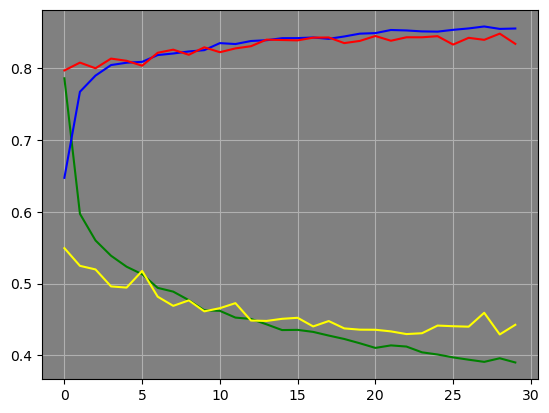

In [148]:
acc_train = hist.history['accuracy']
acc_test = hist.history['val_accuracy']
loss_train = hist.history['loss']
loss_test = hist.history['val_loss']

plt.axes().set_facecolor('gray')
plt.grid('True')


plt.plot(loss_train, color='green', label='Train loss')
plt.plot(loss_test, color='yellow', label='Test loss')
plt.plot(acc_train, color='blue', label='Train acc')
plt.plot(acc_test, color='red', label='Test acc')


plt.show()

In [149]:
y_pred_train = model_cnn.predict(x_train)
y_pred_test = model_cnn.predict(x_test)


index_train = random.randint(0, 9198)
print(f'y_train: {y_train[index_train]} y_pred_train:{y_pred_train[index_train]}')

index_test = random.randint(0, 3942)
print(f'y_test: {y_test[index_test]} y_pred_test:{y_pred_test[index_test]}')


y_train: 2 y_pred_train:[2.3854974e-04 1.4844217e-04 9.9961299e-01]
y_test: 0 y_pred_test:[0.9894595  0.00847819 0.00206233]


In [150]:

y_pred_train_smax = softmax(y_pred_train, axis=1)
y_pred_test_smax = softmax(y_pred_test, axis=1)
 
y_pred_train_smax = np.argmax(y_pred_train_smax, axis=1)
y_pred_test_smax = np.argmax(y_pred_test_smax, axis=1)


y_pred_test_smax.shape, y_pred_train_smax.shape

((3942,), (9198,))

In [151]:
print(f'y_train: {y_train[index_train]} y_pred_train:{y_pred_train_smax[index_train]}')

index_test = random.randint(0, 3948)
print(f'y_test: {y_test[index_test]} y_pred_test:{y_pred_test_smax[index_test]}')

y_train: 2 y_pred_train:2
y_test: 1 y_pred_test:1


In [152]:

acc_train = accuracy_score(y_train, y_pred_train_smax)
acc_test = accuracy_score(y_test, y_pred_test_smax)

p = precision_score(y_test, y_pred_test_smax, average='micro')
r = recall_score(y_test, y_pred_test_smax, average='micro')


print(f'Acc Train: {acc_train} - Acc Test: {acc_test} - Percision: {p} - Recall: {r}')

Acc Train: 0.8679060665362035 - Acc Test: 0.8338406900050735 - Percision: 0.8338406900050735 - Recall: 0.8338406900050735


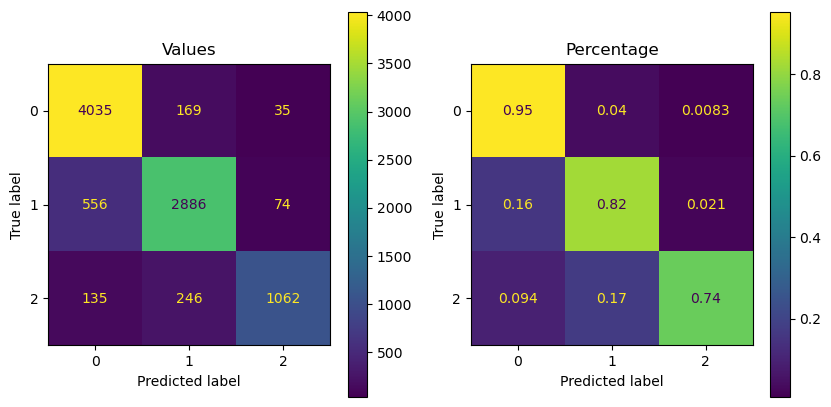

In [153]:
cm_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train_smax)
disp_cm_train = ConfusionMatrixDisplay(cm_train)

cm_train = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
disp_cm_train_perce = ConfusionMatrixDisplay(cm_train)


fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Values')
ax2.set_title('Percentage')
disp_cm_train.plot(ax=ax1);
disp_cm_train_perce.plot(ax=ax2);

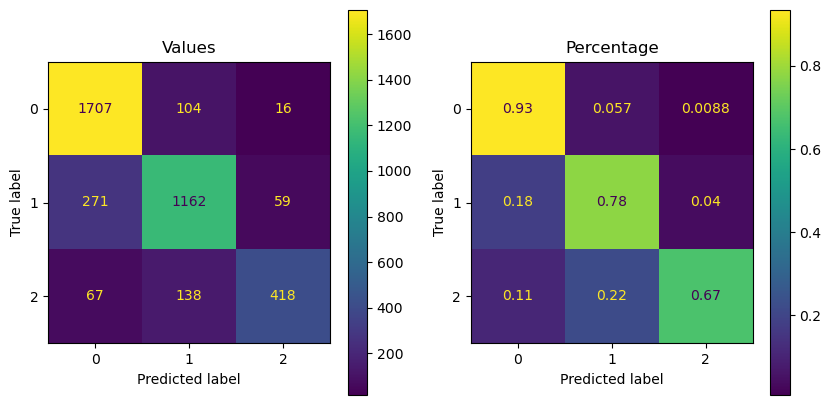

In [154]:
cm_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test_smax)
disp_cm_test = ConfusionMatrixDisplay(cm_test)

cm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
disp_cm_test_perce = ConfusionMatrixDisplay(cm_test)


fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Values')
ax2.set_title('Percentage')
disp_cm_test.plot(ax=ax1);
disp_cm_test_perce.plot(ax=ax2);